# Part II - Prosper Data Presentation
## by Olamide Emida

## Investigation Overview

In this investigation, I wanted to look at the variables of loan that could influence the borrower rate. The main focus was on the following variables: loan amount, monthly income and credit grade. I introduced each variable. I showed the purpose of the loan and I plotted the relationship between borrower rate vs. loan amount, monthly income and rating grade.

## Data Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I selected 15 variables of interest to performed my analysis. View the data [here](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1581581520570000)

In [1]:
# import all packages and set plots to be embedded inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# import the dataset and view the first five rows

prosper = pd.read_csv('prosperLoanData.csv')
prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# create a new dataframe with the variables of interest and view the first five rows

prosper = prosper[['ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 
                    'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 
                    'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 
                    'CurrentlyInGroup', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 
                    'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount']].copy()

prosper.head()

,ListingCreationDate,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount
0,2007-08-26 19:09:29.263000000,C,36,Completed,0.16516,0.1580,NaN,0,Self-employed,2.0,True,True,640.0,659.0,0.17,"$25,000-49,999",3083.333333,9425
1,2014-02-27 08:28:07.900000000,NaN,36,Current,0.12016,0.0920,A,2,Employed,44.0,False,False,680.0,699.0,0.18,"$50,000-74,999",6125.000000,10000
2,2007-01-05 15:00:47.090000000,HR,36,Completed,0.28269,0.2750,NaN,0,Not available,NaN,False,True,480.0,499.0,0.06,Not displayed,2083.333333,3001
3,2012-10-22 11:02:35.010000000,NaN,36,Current,0.12528,0.0974,A,16,Employed,113.0,True,False,800.0,819.0,0.15,"$25,000-49,999",2875.000000,10000
4,2013-09-14 18:38:39.097000000,NaN,36,Current,0.24614,0.2085,D,2,Employed,44.0,True,False,680.0,699.0,0.26,"$100,000+",9583.333333,15000


In [4]:
# convert listing creation date column to datetime data type 

prosper['ListingCreationDate'] = pd.to_datetime(prosper['ListingCreationDate'])

In [5]:
# Create a new variable (RatingGrade) that combines credit grade and prosper rating columns 
#into one column by filling null values.

prosper['RatingGrade'] = prosper['CreditGrade'].fillna(prosper['ProsperRating (Alpha)'])

In [6]:
# rename the listing category column

prosper.rename(columns = {'ListingCategory (numeric)' : 'ListingCategory'}, inplace = True)

# create an average credit score column by using the mean of CreditScoreRangeLower and 
#CreditScoreRangeUpper columns

prosper['CreditScoreAverage'] = (prosper.CreditScoreRangeLower + prosper.CreditScoreRangeUpper)/2

In [7]:
# delete extraneous columns

prosper.drop(['ListingCreationDate', 'CreditGrade', 'ProsperRating (Alpha)', 
               'CreditScoreRangeLower', 'CreditScoreRangeUpper'], 
              axis = 1, inplace = True)

In [8]:
# update the numeric values in the Listing category column

prosper['ListingCategory'] = prosper['ListingCategory'].astype(str)

category = {'0' : 'Not Available', '1' : 'Debt Consolidation', '2' : 'Home Improvement', 
            '3' : 'Business', '4' : 'Personal Loan', '5' : 'Student Use', '6' : 'Auto', 
            '7' : 'Other', '8' : 'Baby&Adoption', '9' : 'Boat', '10' : 'Cosmetic Procedure', 
            '11' : 'Engagement Ring', '12' : 'Green Loans', '13' : 'Household Expenses', 
            '14' : 'Large Purchases', '15' : 'Medical/Dental', '16' : 'Motorcycle', '17' : 'RV', 
            '18' : 'Taxes', '19' : 'Vacation', '20' : 'Wedding Loans'}

def cat_name(prosper_category): 
    if prosper_category['ListingCategory'] in category.keys():
        cat = category[prosper_category['ListingCategory']]
        return cat
    else:
        return prosper_category['ListingCategory']
        
prosper['ListingCategory'] = prosper.apply(cat_name, axis =1)

In [9]:
# Replace full time and part time with employed

prosper['EmploymentStatus'].replace(['Full-time', 'Part-time'], 'Employed', inplace=True)

In [10]:
# check for null values in the dataset

prosper.isnull().sum()

Term                           0
LoanStatus                     0
BorrowerAPR                   25
BorrowerRate                   0
ListingCategory                0
EmploymentStatus            2255
EmploymentStatusDuration    7625
IsBorrowerHomeowner            0
CurrentlyInGroup               0
DebtToIncomeRatio           8554
IncomeRange                    0
StatedMonthlyIncome            0
LoanOriginalAmount             0
RatingGrade                  131
CreditScoreAverage           591
dtype: int64

In [11]:
# remove null values

prosper.dropna(inplace = True)

In [12]:
# check for duplicate rows

prosper.duplicated().sum()

789

In [13]:
# delete the duplicated rows

prosper.drop_duplicates(inplace = True)

## Distribution of Borrower rate

Borrower rate takes a range of values between 5% and 35%. The loan borrower rate with the highest frequency is around 14%. It seems Prosper demands for higher borrower rates overall. 

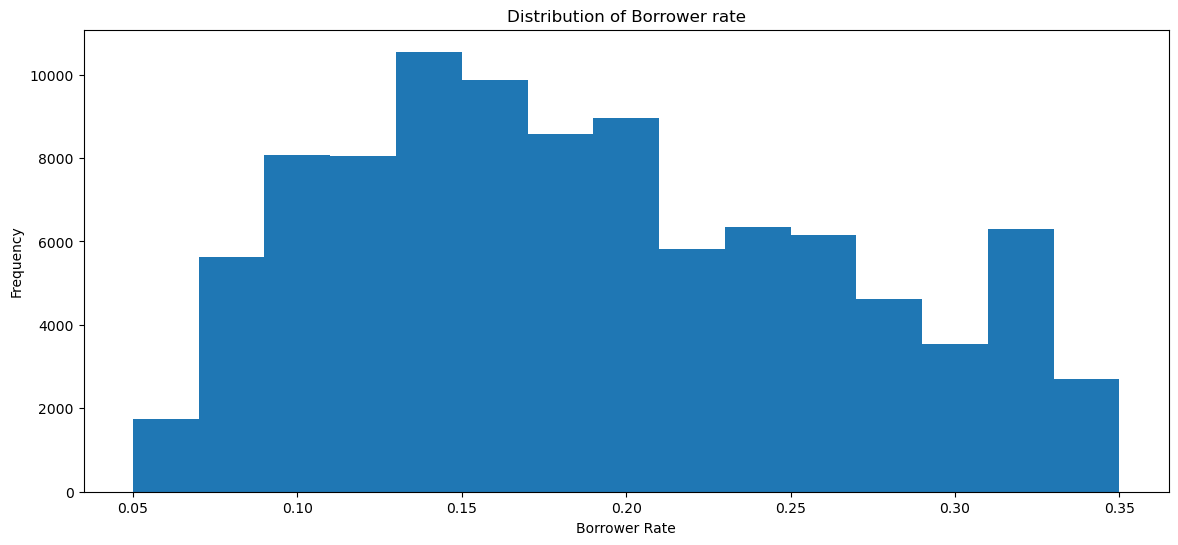

In [14]:
# set plot dimensions to make it easy for users to see the slide on screen
plt.figure(figsize=(14,6))

bin_size = np.arange(0.05, prosper['BorrowerRate'].max(), 0.02)

plt.hist(data = prosper, x = 'BorrowerRate', bins = bin_size);
plt.title('Distribution of Borrower rate')
plt.xlabel('Borrower Rate')
plt.ylabel('Frequency');

## Distribution of Loan amount

The loan amount takes a range of values between 1000 and 25000. Prosper mostly gives out loans with lower amounts around 5000 dollars. The distribution of loan amount is right-tailed.

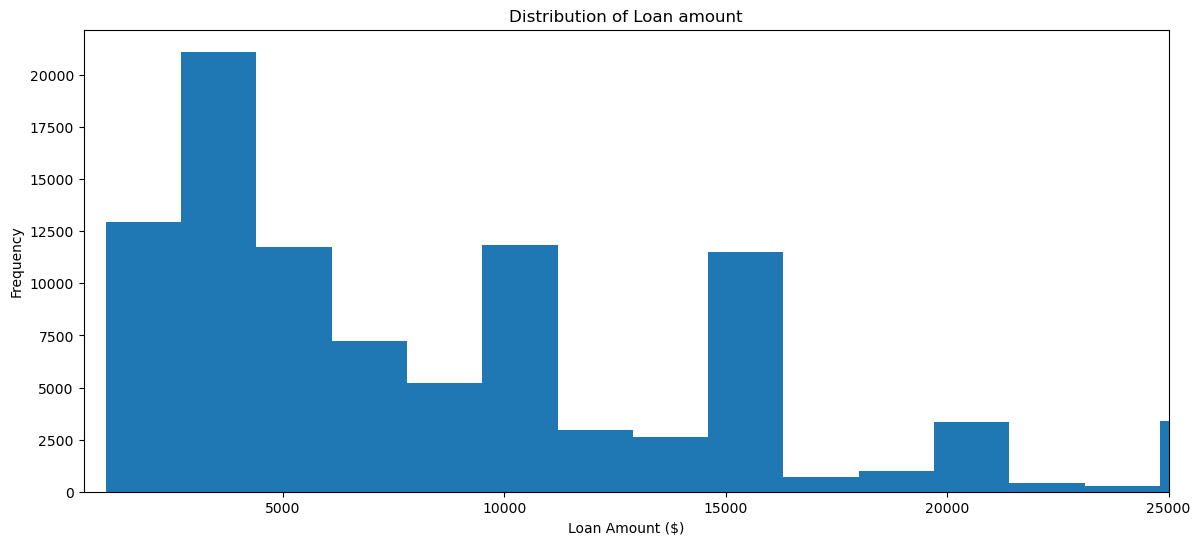

In [15]:
# set plot dimensions
plt.figure(figsize=(14,6))

plt.hist(data = prosper, x = 'LoanOriginalAmount', bins = 20);
plt.title('Distribution of Loan amount')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency');
plt.xlim(500, 25000);

## Purpose of the Loans

Majority of the loans were obtained to pay back other loans; Debt consolidation. This could be the reason most loan amounts were below 5000.

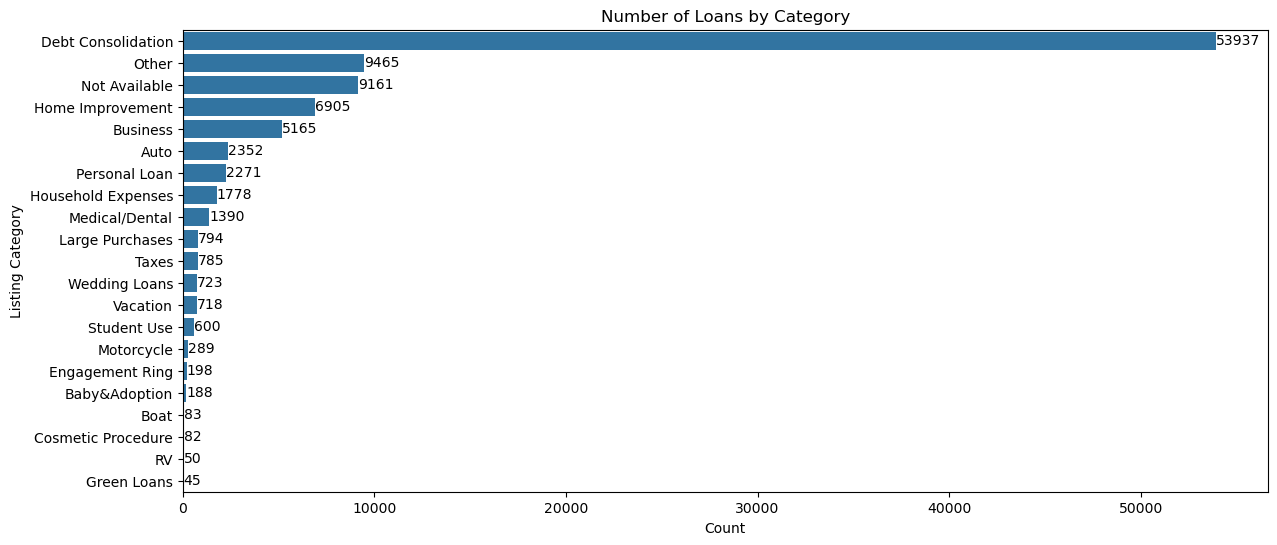

In [16]:
# set plot dimensions
plt.figure(figsize=(14,6))

base_color = sb.color_palette()[0]
category = prosper['ListingCategory'].value_counts()
category_order = category.index
    
sb.countplot(data = prosper, y = 'ListingCategory', 
             color = base_color, order = category_order)
plt.title('Number of Loans by Category')
plt.ylabel('Listing Category')
plt.xlabel('Count')

# include data labels in the plot
for i in range(category.shape[0]):
    count = category[i]
    
    plt.text(count, i, count, va = 'center');

## Loan Amount vs. Borrower Rate

Suprisingly, there is a negative relationship between loan amount and borrower rate. Some borrowers of lower loan amounts below 10000 paid higher borrower rates while borrowers of loan amounts above 25000 paid below 20% as borrower rate.

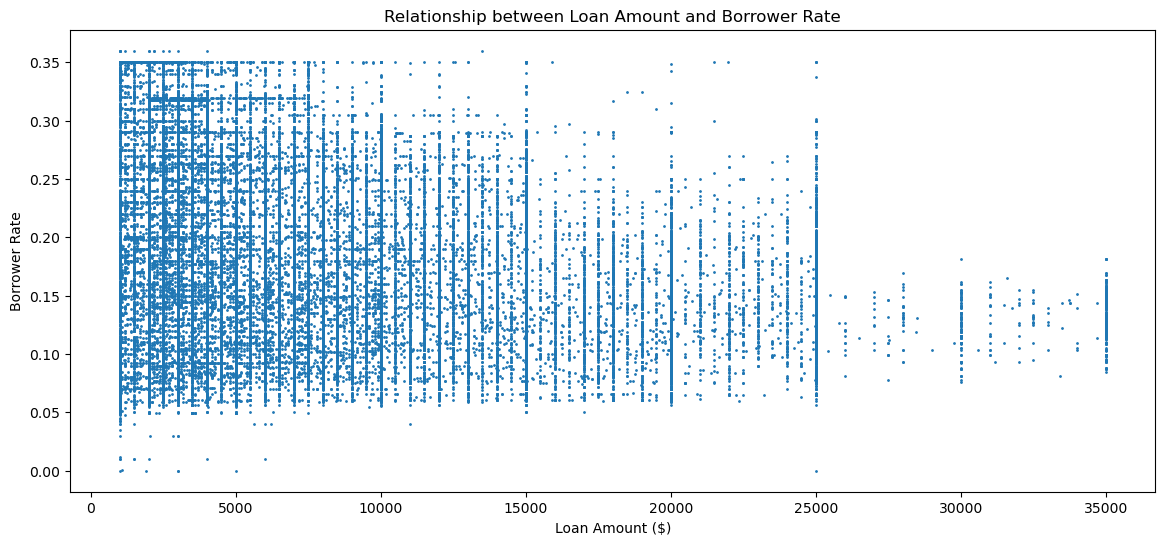

In [17]:
# set plot dimensions
plt.figure(figsize=(14,6))

plt.scatter(data=prosper, x = 'LoanOriginalAmount', y = 'BorrowerRate', 
            s=1)
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower Rate')
plt.title('Relationship between Loan Amount and Borrower Rate');

## Monthly Income and Borrower Rate by Loan Amount

There is a negative relationship between monthly income and borrower Rate. Some borrowers of lower loan amounts (below 15000) with monthly income below 10,000 paid higher borrower rates. Other borrowers earning above 10000 monthly and borrowing above 15000 paid below 25% as borrower rate.

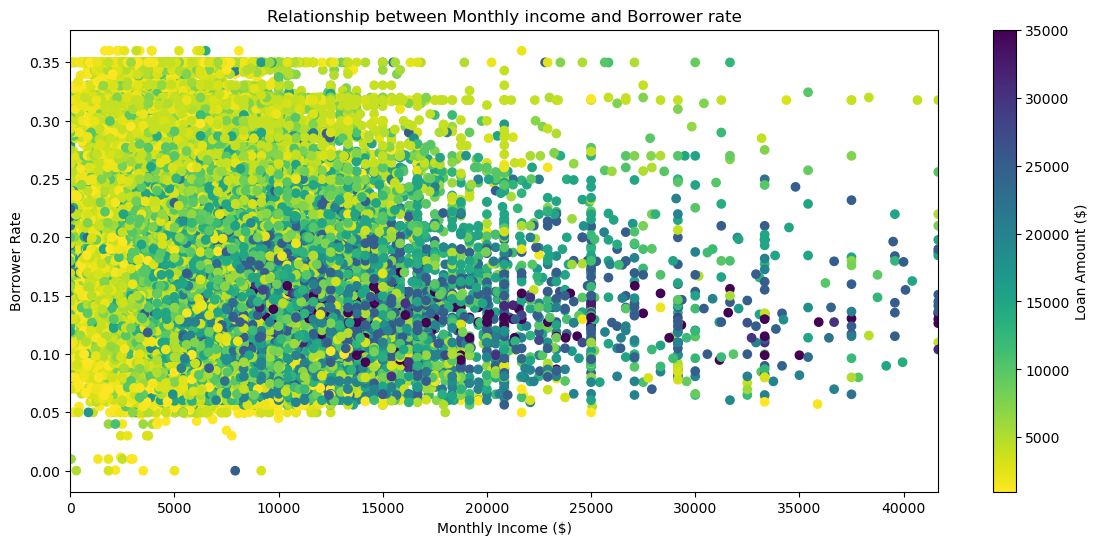

In [18]:
# set plot dimensions
plt.figure(figsize=(14,6))

plt.scatter(data = prosper, x = 'StatedMonthlyIncome', y = 'BorrowerRate', 
            c = 'LoanOriginalAmount', cmap = 'viridis_r')

plt.colorbar(label = 'Loan Amount ($)')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Borrower Rate')
plt.title('Relationship between Monthly income and Borrower rate')
plt.xlim(0, prosper['StatedMonthlyIncome'].quantile(0.999));

## Rating Grade vs Borrower Rate

The loans are graded from AA to HR. AA represents loans with the lowest risk and HR represents loan with the highest risks. There is a positive correlation between rating grade and borrower rate. As the grade (riskiness) increases, borrower rate increases on average.

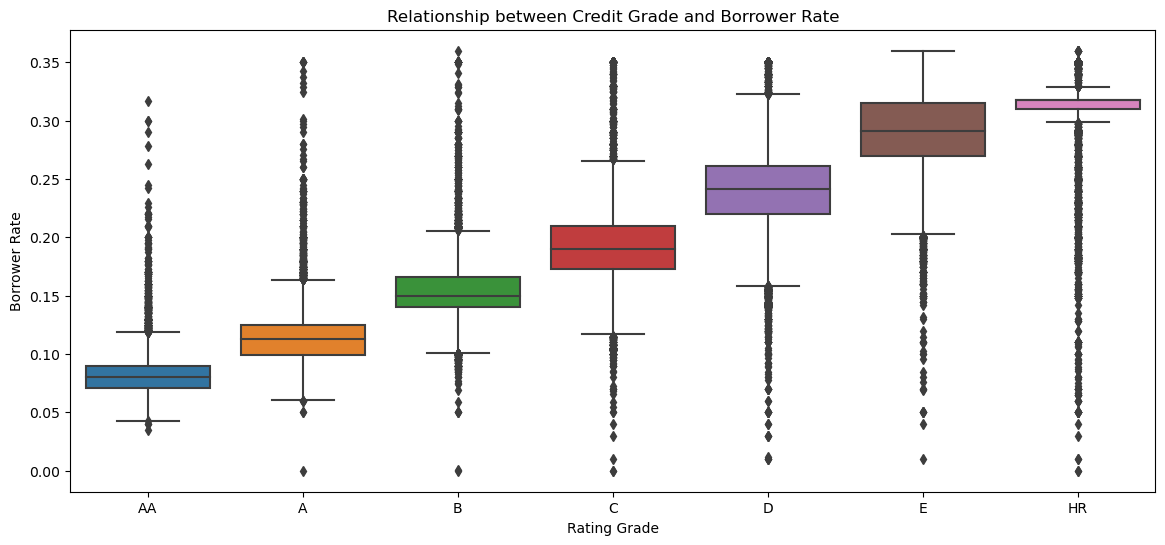

In [19]:
# set plot dimensions
plt.figure(figsize=(14,6))

rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sb.boxplot(data=prosper, x = 'RatingGrade', y = 'BorrowerRate', 
           order = rating_order)
plt.title('Relationship between Credit Grade and Borrower Rate')
plt.ylabel('Borrower Rate')
plt.xlabel('Rating Grade');

## Monthly Income and Borrower Rate by Rating Grade

The negative correlation between monthly incomes and borrower rates only applies to loans with lower risks (AA, A, and B). As income increases, borrower rate decreases for these levels of risk.

However, monthly incomes and borrower rates become positively correlated as the risk increased. That is, for higher risk loans (C, D, E, HR) the borrower rate increases as the grade increases, irrespective of the monthly income.

Therefore, rating grade seems to be the major indicator of borrower rate. Irrespective of the borrowers' monthly incomes and loan amounts, loans with high credit grade (high risk) tend to have high borrower rates.

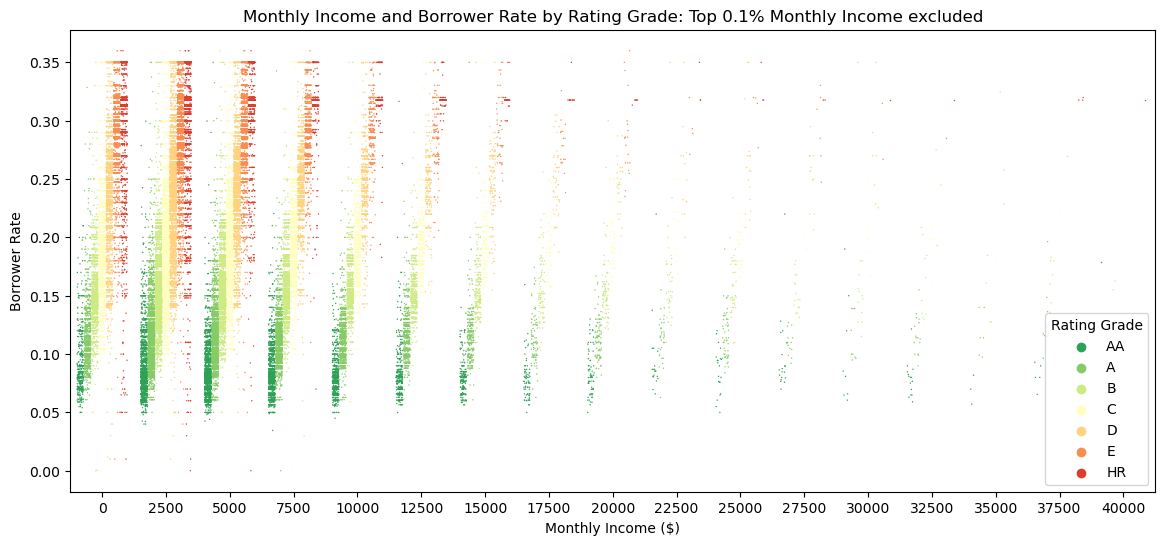

In [20]:
# set plot dimensions
plt.figure(figsize=(14,6))

# create income intervals (say 2500) using floor division (lowest integer divisor)
data = prosper.dropna(subset = ['StatedMonthlyIncome']).copy()
data['StatedMonthlyIncome_int'] = ((prosper['StatedMonthlyIncome']//2500)*2500).astype(int)


sb.stripplot(data = data.query("StatedMonthlyIncome<StatedMonthlyIncome.quantile(0.999)"), 
             x = 'StatedMonthlyIncome_int', y = 'BorrowerRate', hue = 'RatingGrade', hue_order = rating_order, 
             palette = 'RdYlGn_r', order = None, size = 1, jitter=0.35, dodge=True);
plt.title('Monthly Income and Borrower Rate by Rating Grade: Top 0.1% Monthly Income excluded')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Borrower Rate')
plt.legend(title='Rating Grade');

In [ ]:
!jupyter nbconvert Udacity_ProsperData_Project_Part2.ipynb --to slides --post serve --no-input --no-prompt